**Classify a person's credit score based on his/her credit-related information**

(Data taken from https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

<table>
    <tr>
        <td><em>ID</em>&emsp;&emsp;&emsp;</td>
        <td>unique identification of an entry</td>
    </tr>
    <tr>
        <td><em>Customer_ID</em>&emsp;&emsp;&emsp;</td>
        <td>unique identification of a person</td>
    </tr>
    <tr>
        <td><em>Month</em>&emsp;&emsp;&emsp;</td>
        <td>month of the year</td>
    </tr>
    <tr>
        <td><em>Name</em>&emsp;&emsp;&emsp;</td>
        <td>name of person</td>
    </tr>
    <tr>
        <td><em>Age</em>&emsp;&emsp;&emsp;</td>
        <td>age of the person</td>
    </tr>
    <tr>
        <td><em>SSN</em>&emsp;&emsp;&emsp;</td>
        <td>social security number of person</td>
    </tr>
    <tr>
        <td><em>Occupation</em>&emsp;&emsp;&emsp;</td>
        <td>occupation of the person</td>
    </tr>
    <tr>
        <td><em>Annual_Income</em>&emsp;&emsp;&emsp;</td>
        <td>annual income of the person</td>
    </tr>
    <tr>
        <td><em>Monthly_Inhand_Salary</em>&emsp;&emsp;&emsp;</td>
        <td>monthly base salary of the person</td>
    </tr>
    <tr>
        <td><em>Num_Bank_Accounts</em>&emsp;&emsp;&emsp;</td>
        <td>number of bank accounts the person holds</td>
    </tr>
    <tr>
        <td><em>Num_Credit_Card</em>&emsp;&emsp;&emsp;</td>
        <td>number of credit cards the person holds</td>
    </tr>
    <tr>
        <td><em>Interest_Rate</em>&emsp;&emsp;&emsp;</td>
        <td>interest rate on credit card</td>
    </tr>
    <tr>
        <td><em>Num_of_Loan</em>&emsp;&emsp;&emsp;</td>
        <td>number of loans taken from the bank</td>
    </tr>
    <tr>
        <td><em>Type_of_Loan</em>&emsp;&emsp;&emsp;</td>
        <td>types of loan taken by a person</td>
    </tr>
    <tr>
        <td><em>Delay_from_due_date</em>&emsp;&emsp;&emsp;</td>
        <td>average number of days delayed from the payment date</td>
    </tr>
    <tr>
        <td><em>Num_of_Delayed_Payment</em>&emsp;&emsp;&emsp;</td>
        <td>average number of payments delayed by a person</td>
    </tr>
    <tr>
        <td><em>Changed_Credit_Limit</em>&emsp;&emsp;&emsp;</td>
        <td>percentage change in credit card limit</td>
    </tr>
    <tr>
        <td><em>Num_Credit_Inquiries</em>&emsp;&emsp;&emsp;</td>
        <td>number of credit card inquiries</td>
    </tr>
    <tr>
        <td><em>Credit_Mix</em>&emsp;&emsp;&emsp;</td>
        <td>classification of the mix of credits</td>
    </tr>
    <tr>
        <td><em>Outstanding_Debt</em>&emsp;&emsp;&emsp;</td>
        <td>remaining debt to be paid (in USD)</td>
    </tr>
    <tr>
        <td><em>Credit_Utilization_Ratio</em>&emsp;&emsp;&emsp;</td>
        <td>utilization ratio of credit card</td>
    </tr>
    <tr>
        <td><em>Credit_History_Age</em>&emsp;&emsp;&emsp;</td>
        <td>age of credit history of the person</td>
    </tr>
    <tr>
        <td><em>Payment_of_Min_Amount</em>&emsp;&emsp;&emsp;</td>
        <td>whether only the minimum amount was paid by the person</td>
    </tr>
    <tr>
        <td><em>Total_EMI_per_month</em>&emsp;&emsp;&emsp;</td>
        <td>monthly EMI payments (in USD)</td>
    </tr>
    <tr>
        <td><em>Amount_invested_monthly</em>&emsp;&emsp;&emsp;</td>
        <td>monthly amount invested by the customer (in USD)</td>
    </tr>
    <tr>
        <td><em>Payment_Behaviour</em>&emsp;&emsp;&emsp;</td>
        <td>payment behavior of the customer (in USD)</td>
    </tr>
    <tr>
        <td><em>Monthly_Balance</em>&emsp;&emsp;&emsp;</td>
        <td>monthly balance amount of the customer (in USD)</td>
    </tr>
    <tr>
        <td><em>Credit_Score</em>&emsp;&emsp;&emsp;</td>
        <td>credit rating</td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Set a couple of defaults
plt.rcParams.update({'font.size': 7})
pd.set_option('display.max_columns', None)

In [3]:
# Read training data
df = pd.read_csv('Cred_score_class_rparis_train.csv')
df.head()

/tmp/ipykernel_1901/2072387350.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Cred_score_class_rparis_train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


It's already obvious we don't have complete data, and some of our columns have mixed data types, so our data will require processing, including cleaning

In [4]:
# Confirm number of columns
len(df.columns)

28

In [5]:
# Check number of rows
len(df)

100000

In [6]:
# Check number of customers
df['Customer_ID'].nunique()

12500

In [7]:
# Guage amount of missing or invalid data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

We see that *Name*, *Monthly_Inhand_Salary*, *Type_of_Loan*, *Num_of_Delayed_Payment*, *Num_Credit_Inquiries*, *Credit_History_Age*, *Amount_invested_monthly*, and *Monthly_Balance* are missing data, in some cases, over 10000 rows of data are missing. And even among those features with complete data, as has already been mentioned, many have either string or mixed data types (i.e., 'object') which will need processing as well, but let us start by calculating the exact amount of incomplete data

In [8]:
# Quantify missing data
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

We want to build a model that can award a credit score to a person based on that person's credit information, but how *reliable* will the allocated score be? Experience tells us that the more data there is for training machines, the more reliable their answers to questions relevant to the data become

<Axes: xlabel='Credit_Score', ylabel='count'>

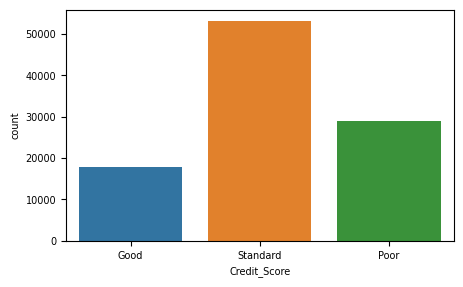

In [9]:
# Countplot
plt.figure(figsize=(5,3))
sns.countplot(x='Credit_Score',data=df)

With counts for Standard about twice the number for Poor and thrice the number for Good, we can say that our model will probably be better at correctly allocating standard credit scores than poor and good.

Before we start dealing with missing data, it would be useful to find out the correlation between what we have and the credit scores. But, we cannot use the credit score values as they are since they are in words; we will therefore convert them to *ranks* where Good == 1, Standard == 2, and Poor == 3

In [10]:
# Convert Credit_Score values to ranks
df['Credit_Score_Rank'] = df['Credit_Score'].apply(lambda x : 1 if x=='Good' else (2 if x=='Standard' else 3))

In [11]:
df.corr(numeric_only=True)

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score_Rank
Monthly_Inhand_Salary,1.000000,-0.010819,-0.005049,-0.006422,-0.250100,-0.008867,0.173192,0.007264,-0.209318
Num_Bank_Accounts,-0.010819,1.000000,-0.002216,-0.003998,0.015966,-0.001683,-0.001365,-0.001433,0.010491
Num_Credit_Card,-0.005049,-0.002216,1.000000,-0.004012,0.008715,-0.003479,-0.003341,0.000768,0.007624
Interest_Rate,-0.006422,-0.003998,-0.004012,1.000000,0.009792,-0.001681,-0.000359,0.002517,0.002591
Delay_from_due_date,-0.250100,0.015966,0.008715,0.009792,1.000000,0.011508,-0.063796,-0.003889,0.431591
Num_Credit_Inquiries,-0.008867,-0.001683,-0.003479,-0.001681,0.011508,1.000000,0.000145,-0.007031,0.011235
Credit_Utilization_Ratio,0.173192,-0.001365,-0.003341,-0.000359,-0.063796,0.000145,1.000000,0.001389,-0.045793
Total_EMI_per_month,0.007264,-0.001433,0.000768,0.002517,-0.003889,-0.007031,0.001389,1.000000,-0.004382
Credit_Score_Rank,-0.209318,0.010491,0.007624,0.002591,0.431591,0.011235,-0.045793,-0.004382,1.000000


We see that *Delay_from_due_date* has the highest correlation with *Credit_Score_Rank*, and it is positive. This is hardly surprising, but let us visualise this relationship a little

In [12]:
df['Delay_from_due_date'].value_counts()

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

<Axes: xlabel='Delay_from_due_date', ylabel='count'>

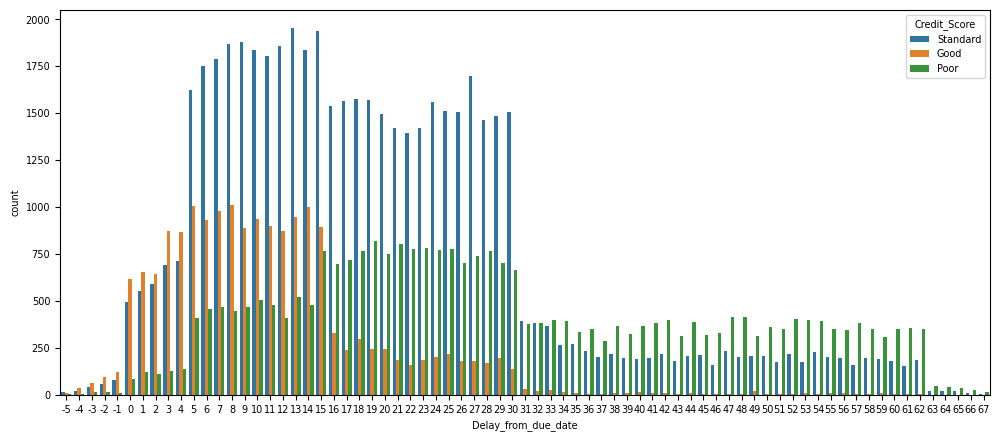

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='Delay_from_due_date',data=df.sort_values('Delay_from_due_date'),hue='Credit_Score')

Now this is a little tricky to read as there are so many values for Delay_from_due_date, but we can see that customers with good credit scores most frequently have Delay_from_due_date values of 5 to 15 days; standard credit score customers are also most frequently found with Delay_from_due_date values of 5 to 15 days, but in much higher numbers, and poor credit score customers are most frequently found with Delay_from_due_date values of 18 to 30 days. Also, notice that these peaks are much smaller than the ones for good and standard, reflecting the fact that fewer loans are given to customers with poor credit scores, and of course the longer the Delay_from_due_date value, the fewer customers we see, even for customers with poor credit scores, which again, makes sense.

Let us look closer at what the credit scores are doing close to the horizontal axis

(0.0, 100.0)

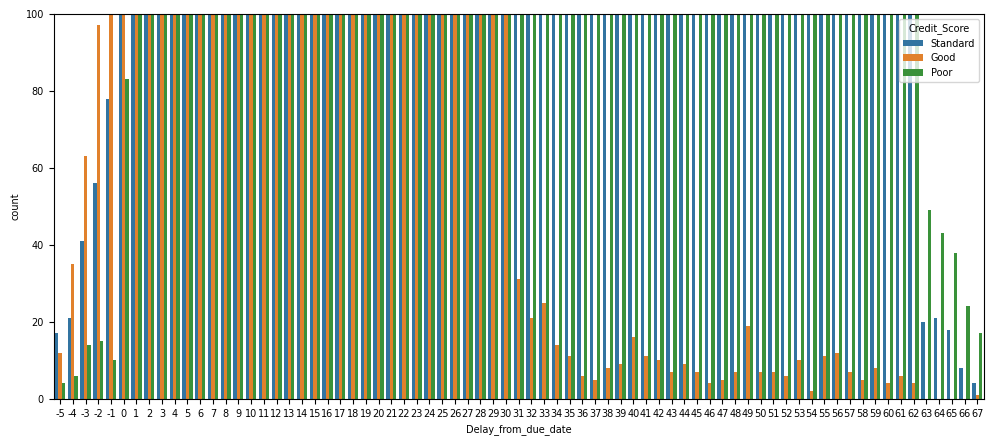

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x='Delay_from_due_date',data=df.sort_values('Delay_from_due_date'),hue='Credit_Score')
plt.ylim(0,100)

We notice that even with excellent Delay_from_due_date values (such as -5 days), we still see customers with poor credit scores although not as many as such customers with long Delay_from_due_date values (such as 67 days). But even here, we are still seeing customers with good credit scores although not as many as such customers with short Delay_from_due_date values. What this graph illustrates is that lending is an 'uncertain art'. It is very difficult to predict with a very high degree of certainty whether a loan will be repaid. It is therefore not surprising that the correlation between Delay_from_due_date and Credit_Score_Rank is *only* about 0.4.

One seemingly surprising correlation result is the one between *Monthly_Inhand_Salary* and Credit_Score(_Rank); the relationship is weak and negative! This may seem to contradict commonsense but one way of looking at it is that the less income a person earns, the more likely the person is to borrow. But then people that earn more that borrow, are more likely to borrow more or be *allowed* to borrow more, which may impact their ability to repay back the loan. Just one way of looking at it!

Despite the rather weak (negative) correlation between *Monthly_Inhand_Salary* and Credit_Score(_Rank) (about -0.2), the Monthly_Inhand_Salary is still an important feature to consider when considering a loan application. Moreover, its values help us make sense of the debt burden. It is missing over 15000 rows, but are these distributed (roughly) equally across all Credit_Scores or do they fall disproportionately on one score value? 

In [15]:
len(df[(df['Monthly_Inhand_Salary'].isnull()) & (df['Credit_Score'] == 'Good')])

2758

In [16]:
len(df[(df['Monthly_Inhand_Salary'].isnull()) & (df['Credit_Score'] == 'Standard')])

7887

In [17]:
len(df[(df['Monthly_Inhand_Salary'].isnull()) & (df['Credit_Score'] == 'Poor')])

4357

In [18]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [19]:
len(df[(df['Monthly_Inhand_Salary'].isnull()) & (df['Credit_Score'] == 'Good')])/df['Credit_Score'].value_counts()['Good']

0.15470047116894772

In [20]:
len(df[(df['Monthly_Inhand_Salary'].isnull()) & (df['Credit_Score'] == 'Standard')])/df['Credit_Score'].value_counts()['Standard']

0.14832436905254448

In [21]:
len(df[(df['Monthly_Inhand_Salary'].isnull()) & (df['Credit_Score'] == 'Poor')])/df['Credit_Score'].value_counts()['Poor']

0.15025174149941375

The percentage of rows that are missing *Monthly_Inhand_Salary* values in the 3 Credit_Score categories are identical at 15% (to 2 significant figures). The identical percentages would be a reasonable basis for dropping rows or even the entire column, but 15% is such a large amount of data to discard and it is quite difficult to make credit rating decisions without knowing the person's income. Hence, we have to think of alternatives...

One alternative is imputing the missing Monthly_Inhand_Salaries with the known salary of the person when s/he took other loans. Ideally, we want a salary value that is within the same occupation category for the person when imputing, but if the occupation is not known, then we just go with the known maximum salary of the person when s/he took other loans.

In [22]:
df.groupby('Customer_ID')[['Monthly_Inhand_Salary', 'Occupation']].max()

,Monthly_Inhand_Salary,Occupation
Customer_ID,,
CUS_0x1000,2706.161667,Lawyer
CUS_0x1009,4250.390000,_______
CUS_0x100b,9549.782500,Media_Manager
CUS_0x1011,5208.872500,Doctor
CUS_0x1013,7962.415000,Mechanic
...,...,...
CUS_0xff3,1176.398750,Scientist
CUS_0xff4,2415.855000,Entrepreneur
CUS_0xff6,9727.326667,Doctor


In [23]:
df.groupby('Customer_ID')[['Monthly_Inhand_Salary', 'Occupation']].max()['Monthly_Inhand_Salary']

Customer_ID
CUS_0x1000    2706.161667
CUS_0x1009    4250.390000
CUS_0x100b    9549.782500
CUS_0x1011    5208.872500
CUS_0x1013    7962.415000
                 ...     
CUS_0xff3     1176.398750
CUS_0xff4     2415.855000
CUS_0xff6     9727.326667
CUS_0xffc     5218.097500
CUS_0xffd     3749.870000
Name: Monthly_Inhand_Salary, Length: 12500, dtype: float64

In [24]:
# define imputation function
df2 = df.groupby('Customer_ID')[['Monthly_Inhand_Salary', 'Occupation']].max()['Monthly_Inhand_Salary']

def impute_salary(col):
    Customer_ID = col[0]
    Monthly_Inhand_Salary = col[1]
    
    if pd.isnull(Monthly_Inhand_Salary):
        return df2[Customer_ID]
    else:
        return Monthly_Inhand_Salary


In [25]:
# Implement imputation function
df['Monthly_Inhand_Salary'] = df[['Customer_ID', 'Monthly_Inhand_Salary']].apply(impute_salary,axis=1)

In [26]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
Credit_Score_Rank               0
dtype: int64

That's Monthly_Inhand_Salary sorted.

Let's look at *Type_of_Loan*

In [27]:
len(df[df['Type_of_Loan'].isnull()==True])/len(df)

0.11408

It is missing just over 11% of its data; what sort of information does this feature give us?

In [28]:
df['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

There are 6260 different types of loans and some types have been grouped together. This makes it difficult (although not impossible) to devise a rational enumeration system for the types of loans. Let us look at *Occupation*

In [29]:
df['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [30]:
df['Occupation'].nunique()

16

There are 16 different job titles, including "*_______*"; we can simply replace the long dash with 'Undefined'

In [31]:
df['Occupation'] = df['Occupation'].apply(lambda x : 'Undefined' if x == '_______' else x)

In [32]:
df['Occupation'].value_counts()

Occupation
Undefined        7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

Although we could use natural language processing to convert the various types of loans into numbers (which our machine learning model would understand), I feel that many of the loan types are too vague (in one hybrid type, 'Student loan' appears twice, why?). I have therefore opted to drop Type_of_Loan and convert the various job titles to booleans and then drop Occupation

In [33]:
df.drop('Type_of_Loan',axis=1,inplace=True)

In [34]:
Occupation = pd.get_dummies(df['Occupation'])

In [35]:
Occupation.head()

,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Undefined,Writer
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [36]:
df.drop('Occupation',axis=1,inplace=True)

In [37]:
df = pd.concat([df,Occupation],axis=1)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Score_Rank,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Undefined,Writer
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,19114.12,1824.843333,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,19114.12,1824.843333,3,4,3,4,3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,19114.12,1824.843333,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [38]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        9985
Age                            0
SSN                            0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit           0
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
Credit_Score_Rank              0
Accountant                     0
Architect                      0
Developer                      0
Doctor    

We can drop *Name* at this point as one wouldn't normally include the names of individuals in data studies to be made public

In [39]:
df.drop('Name',axis=1,inplace=True)
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit           0
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
Credit_Score_Rank              0
Accountant                     0
Architect                      0
Developer                      0
Doctor                         0
Engineer  

Let us now look at *Num_of_Delayed_Payment*

In [40]:
df['Num_of_Delayed_Payment'].value_counts()

Num_of_Delayed_Payment
19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: count, Length: 749, dtype: int64

There are 749 different numbers of delayed payments; let us group these per customer

In [41]:
df.groupby('Customer_ID')['Num_of_Delayed_Payment'].value_counts()

Customer_ID  Num_of_Delayed_Payment
CUS_0x1000   25                        4
             23                        2
             26                        1
             28                        1
CUS_0x1009   18                        5
                                      ..
CUS_0xffc    14                        2
             19                        2
CUS_0xffd    12                        5
             11                        1
             9                         1
Name: count, Length: 41713, dtype: int64

We can see that delayed payments are very common so keeping these in the data would be useful. Giving out a loan is a risk to the creditor so it is probably prudent to consider the worst possible scenario for our machine learning model. What I mean here is that we impute the missing numbers of delayed payments with the known maximum number of delayed payments for the customer in question

In [42]:
df[['Customer_ID','Num_of_Delayed_Payment']]

,Customer_ID,Num_of_Delayed_Payment
0,CUS_0xd40,7
1,CUS_0xd40,NaN
2,CUS_0xd40,7
3,CUS_0xd40,4
4,CUS_0xd40,NaN
...,...,...
99995,CUS_0x942c,7
99996,CUS_0x942c,7
99997,CUS_0x942c,6
99998,CUS_0x942c,NaN


In [43]:
df[['Customer_ID','Num_of_Delayed_Payment']].dropna()

,Customer_ID,Num_of_Delayed_Payment
0,CUS_0xd40,7
2,CUS_0xd40,7
3,CUS_0xd40,4
5,CUS_0xd40,4
6,CUS_0xd40,8_
...,...,...
99994,CUS_0x942c,6
99995,CUS_0x942c,7
99996,CUS_0x942c,7
99997,CUS_0x942c,6


We can see the entry '8_' which is clearly not a number; we need to find out how many such entries we have (a number mixed with a non-numerical character)

In [44]:
df['Num_of_Delayed_Payment'].str.contains('_').value_counts().dropna()

Num_of_Delayed_Payment
False    90254
True      2744
Name: count, dtype: int64

Quite a lot!

We clearly need to get rid of these programmatically. This can be done by converting all entries in Num_of_Delayed_Payment into strings and then replacing "*_*" with ".0" and then converting everything to numbers. We'll need a function to help us with that

In [45]:
def remove_underscore(col):
    Num_of_Delayed_Payment = col[0]
    
    if pd.isnull(Num_of_Delayed_Payment):
        pass
    else:
        if '_' in str(Num_of_Delayed_Payment):
            return eval(str(Num_of_Delayed_Payment).replace('_','.0'))
        else:
            return int(Num_of_Delayed_Payment)
            

In [46]:
df["Num_of_Delayed_Payment"] = df[["Num_of_Delayed_Payment"]].apply(remove_underscore,axis=1)

In [47]:
df.groupby('Customer_ID')['Num_of_Delayed_Payment'].max()

Customer_ID
CUS_0x1000      28.0
CUS_0x1009    1749.0
CUS_0x100b       9.0
CUS_0x1011      17.0
CUS_0x1013       9.0
               ...  
CUS_0xff3       11.0
CUS_0xff4       14.0
CUS_0xff6        7.0
CUS_0xffc       19.0
CUS_0xffd       12.0
Name: Num_of_Delayed_Payment, Length: 12500, dtype: float64

CUS_0x1009's 1749 maximum for number of delayed payments is quite eye-catching; let us investigate this a little further

In [48]:
df[df['Customer_ID'] == 'CUS_0x1009']

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Score_Rank,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Undefined,Writer
13760,0x66a2,CUS_0x1009,January,25,#F%$D@*&8,52312.68,4250.39,6,5,17,4,8,1749.0,9.73,2.0,Standard,202.68,23.679534,30 Years and 5 Months,NM,108.366467,261.2109793689318,Low_spent_Medium_value_payments,335.4615535058126,Standard,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
13761,0x66a3,CUS_0x1009,February,25,063-67-6938,52312.68,4250.39,6,5,17,4,8,16.0,9.73,2.0,Standard,202.68,28.451199,30 Years and 6 Months,Yes,108.366467,142.4647303239083,High_spent_Medium_value_payments,424.20780255083616,Standard,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
13762,0x66a4,CUS_0x1009,March,26,063-67-6938,52312.68,4250.39,6,5,17,4_,8,18.0,9.73,2.0,Standard,202.68,26.371982,30 Years and 7 Months,Yes,108.366467,162.7830849440951,High_spent_Medium_value_payments,403.8894479306493,Standard,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
13763,0x66a5,CUS_0x1009,April,26,063-67-6938,52312.68,4250.39,6,5,17,1094,10,18.0,9.73,2.0,_,202.68_,24.996239,NaN,Yes,108.366467,171.4504427290597,High_spent_Small_value_payments,405.22209014568483,Standard,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
13764,0x66a6,CUS_0x1009,May,26,063-67-6938,52312.68,4250.39,6,5,17,4,8,19.0,9.73,4.0,_,202.68,30.381814,30 Years and 9 Months,Yes,108.366467,70.92860618916454,High_spent_Medium_value_payments,495.74392668557994,Standard,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
13765,0x66a7,CUS_0x1009,June,26,063-67-6938,52312.68,4250.39,6,5,17,4,3,18.0,9.73,4.0,Standard,202.68,30.608990,30 Years and 10 Months,Yes,108.366467,150.79593432594388,!@9#%8,445.87659854880053,Standard,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
13766,0x66a8,CUS_0x1009,July,26,063-67-6938,52312.68,4250.39,6,5,17,4,8,18.0,9.73,4.0,Standard,202.68,33.943118,30 Years and 11 Months,Yes,108.366467,155.14105344210978,High_spent_Medium_value_payments,411.5314794326347,Standard,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
13767,0x66a9,CUS_0x1009,August,26,063-67-6938,52312.68_,4250.39,6,5,17,4,5,18.0,9.73,4.0,_,202.68,40.286997,31 Years and 0 Months,Yes,108.366467,58.66019164829086,High_spent_Medium_value_payments,508.01234122645366,Standard,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


The number is quite out of kilter from everything else although a high number of loans of 1094 with a corresponding low number of delayed payments has also been recorded. Out of prudence, I will recheck the original unprocessed data so as to make sure these high numbers are not the result of something I have done

In [49]:
df_recheck = pd.read_csv('Cred_score_class_rparis_train.csv')
df_recheck[df_recheck['Customer_ID'] == 'CUS_0x1009']

/tmp/ipykernel_1901/2075568673.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_recheck = pd.read_csv('Cred_score_class_rparis_train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
13760,0x66a2,CUS_0x1009,January,Arunah,25,#F%$D@*&8,Mechanic,52312.68,4250.39,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",8,1749,9.73,2.0,Standard,202.68,23.679534,30 Years and 5 Months,NM,108.366467,261.2109793689318,Low_spent_Medium_value_payments,335.4615535058126,Standard
13761,0x66a3,CUS_0x1009,February,Arunah,25,063-67-6938,Mechanic,52312.68,4250.39,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",8,16,9.73,2.0,Standard,202.68,28.451199,30 Years and 6 Months,Yes,108.366467,142.4647303239083,High_spent_Medium_value_payments,424.20780255083616,Standard
13762,0x66a4,CUS_0x1009,March,Arunah,26,063-67-6938,Mechanic,52312.68,4250.39,6,5,17,4_,"Not Specified, Home Equity Loan, Credit-Builde...",8,18,9.73,2.0,Standard,202.68,26.371982,30 Years and 7 Months,Yes,108.366467,162.7830849440951,High_spent_Medium_value_payments,403.8894479306493,Standard
13763,0x66a5,CUS_0x1009,April,Arunah,26,063-67-6938,Mechanic,52312.68,4250.39,6,5,17,1094,"Not Specified, Home Equity Loan, Credit-Builde...",10,18,9.73,2.0,_,202.68_,24.996239,NaN,Yes,108.366467,171.4504427290597,High_spent_Small_value_payments,405.22209014568483,Standard
13764,0x66a6,CUS_0x1009,May,Arunah,26,063-67-6938,Mechanic,52312.68,4250.39,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",8,19,9.73,4.0,_,202.68,30.381814,30 Years and 9 Months,Yes,108.366467,70.92860618916454,High_spent_Medium_value_payments,495.74392668557994,Standard
13765,0x66a7,CUS_0x1009,June,Arunah,26,063-67-6938,_______,52312.68,4250.39,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",3,18,9.73,4.0,Standard,202.68,30.608990,30 Years and 10 Months,Yes,108.366467,150.79593432594388,!@9#%8,445.87659854880053,Standard
13766,0x66a8,CUS_0x1009,July,Arunah,26,063-67-6938,Mechanic,52312.68,4250.39,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",8,18,9.73,4.0,Standard,202.68,33.943118,30 Years and 11 Months,Yes,108.366467,155.14105344210978,High_spent_Medium_value_payments,411.5314794326347,Standard
13767,0x66a9,CUS_0x1009,August,Arunah,26,063-67-6938,Mechanic,52312.68_,4250.39,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",5,18,9.73,4.0,_,202.68,40.286997,31 Years and 0 Months,Yes,108.366467,58.66019164829086,High_spent_Medium_value_payments,508.01234122645366,Standard


They are not!

We can now impute the missing numbers of delayed payments with the known maximum number of delayed payments for the customer as alluded to earlier; again, we will need a function to help with that  

In [50]:
maxima = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].max()

def impute_num_del_pay(col):
    Customer_ID = col[0]
    Num_of_Delayed_Payment = col[1]
    
    if pd.isnull(Num_of_Delayed_Payment):
        return maxima[Customer_ID]
    else:
        return Num_of_Delayed_Payment

In [51]:
df['Num_of_Delayed_Payment'] = df[['Customer_ID', 'Num_of_Delayed_Payment']].apply(impute_num_del_pay,axis=1)

In [52]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
Credit_Score_Rank              0
Accountant                     0
Architect                      0
Developer                      0
Doctor                         0
Engineer  

Four columns left; let us consider *Num_Credit_Inquiries*; we are told this is the number of credit card enquiries. Now whilst this kind of information is useful, what we really want to know is whether the person is actually *paying* back the loan rather than how many times s/he is making credit card enquiries (which could be for a host of reasons). Therefore, I will drop this column

In [53]:
df.drop('Num_Credit_Inquiries',axis=1,inplace=True)

Next, *Credit_History_Age*, which tells us how long a person's credit history is. This is actually quite useful in quantifying risk when a loan is being considered, so it is worth keeping it. Let us guage some idea of its magnitude across customers

In [54]:
df.groupby('Customer_ID')['Credit_History_Age'].value_counts()

Customer_ID  Credit_History_Age   
CUS_0x1000   10 Years and 2 Months    1
             10 Years and 3 Months    1
             10 Years and 9 Months    1
             10 Years and 8 Months    1
             10 Years and 7 Months    1
                                     ..
CUS_0xffd    18 Years and 5 Months    1
             18 Years and 4 Months    1
             18 Years and 3 Months    1
             18 Years and 2 Months    1
             18 Years and 9 Months    1
Name: count, Length: 90970, dtype: int64

From the little we can see, the value appears to be fairly constant for all loans the customer in question takes. To be able to use these in our model, we need to convert them to numbers. We could do this by either converting to datetime objects and then converting to numbers or converting directly to numbers without the intermediate datetime step. I'll go for the latter. We'll need a function for that, but before that, let us see if all entries have 'Years', ' and ' (the word "and" with one space either side), and 'Months' 

In [55]:
df['Credit_History_Age'].str.contains('Years').value_counts()

Credit_History_Age
True    90970
Name: count, dtype: int64

In [56]:
df['Credit_History_Age'].str.contains(' and ').value_counts()

Credit_History_Age
True    90970
Name: count, dtype: int64

In [57]:
df['Credit_History_Age'].str.contains('Months').value_counts()

Credit_History_Age
True    90970
Name: count, dtype: int64

All of them; that's useful to know. On to our function

In [58]:
def string_time_to_nums(col):
    Credit_History_Age = col[0]
    
    if pd.isnull(Credit_History_Age):
        pass
    else:
        Credit_History_Age_sliced = Credit_History_Age.split(' ')
        Credit_History_Age_sliced[0] = int(Credit_History_Age_sliced[0]) * 12  # Convert years to months
        Credit_History_Age_sliced[3] = int(Credit_History_Age_sliced[3])
        
        return(Credit_History_Age_sliced[0] + Credit_History_Age_sliced[3])

In [59]:
df['Credit_History_Age'] = df[['Credit_History_Age']].apply(string_time_to_nums,axis=1)

In [60]:
df.groupby('Customer_ID')['Credit_History_Age'].value_counts()

Customer_ID  Credit_History_Age
CUS_0x1000   122.0                 1
             123.0                 1
             129.0                 1
             128.0                 1
             127.0                 1
                                  ..
CUS_0xffd    221.0                 1
             220.0                 1
             219.0                 1
             218.0                 1
             225.0                 1
Name: count, Length: 90970, dtype: int64

We shall impute missing values with the mean per customer

In [61]:
df.groupby('Customer_ID')['Credit_History_Age'].mean()

Customer_ID
CUS_0x1000    125.500000
CUS_0x1009    368.571429
CUS_0x100b    186.857143
CUS_0x1011    186.500000
CUS_0x1013    210.428571
                 ...    
CUS_0xff3     204.000000
CUS_0xff4     221.285714
CUS_0xff6     295.500000
CUS_0xffc     154.333333
CUS_0xffd     221.500000
Name: Credit_History_Age, Length: 12500, dtype: float64

In [62]:
mean_history_age = df.groupby('Customer_ID')['Credit_History_Age'].mean()

def impute_history_age(col):
    Customer_ID = col[0]
    Credit_History_Age = col[1]
    
    if pd.isnull(Credit_History_Age):
        return mean_history_age[Customer_ID]
    else:
        return Credit_History_Age

In [63]:
df['Credit_History_Age'] = df[['Customer_ID', 'Credit_History_Age']].apply(impute_history_age,axis=1)

In [64]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
Credit_Score_Rank              0
Accountant                     0
Architect                      0
Developer                      0
Doctor                         0
Engineer                       0
Entreprene

Two columns left

In [65]:
df.groupby('Customer_ID')['Amount_invested_monthly'].value_counts()

Customer_ID  Amount_invested_monthly
CUS_0x1000   109.05651876486915         1
             87.90990881495769          1
             77.31427572208112          1
             266.59716045509043         1
             244.75028300769162         1
                                       ..
CUS_0xffd    234.3549398533252          1
             195.52927326749446         1
             132.3633479629823          1
             104.6294735081563          1
             47.007378731604064         1
Name: count, Length: 94899, dtype: int64

In [66]:
df.groupby('Customer_ID')['Monthly_Balance'].value_counts()

Customer_ID  Monthly_Balance   
CUS_0x1000   251.0779157891069     1
             252.9247932365056     1
             419.7651674292397     1
             400.36080052211616    1
             372.87267565273436    1
                                  ..
CUS_0xffd    266.4810772795904     1
             247.6554106937596     1
             194.02065701806748    1
             145.88011945136975    1
             395.0029718154808     1
Name: count, Length: 98800, dtype: int64

A person's *Monthly_Balance* is clearly useful to know when considering (further) loans for that person; the *Amount_invested_monthly* on the other hand? We would need to know what the person is actually investing in; we have no other information to support the investment column and more crucially, we have no *turnover* column to help us evaluate the *return* on the investment. The turnover/return would clearly be important in helping us decide on a loan application. We do have *Monthly_Inhand_Salary*, which is the person's income, but we are already going to keep that. Without a turnover/return column, the *Amount_invested_monthly* is just an expense, which ideally we should take into account, but then we would need ALL expenses to properly evaluate this against a loan application.

So, whilst we could (easily) complete the missing data for *Amount_invested_monthly*, because I have no context on which to judge its value, I will drop it; information on the payment of the loan will be given greater weighting. As for *Monthly_Balance*, missing values will be filled with the mean value for the customer

In [67]:
df.drop('Amount_invested_monthly',axis=1,inplace=True)

We already know that Monthly_Balance is an object type column, which means it almost certainly has string data. Let us try to pinpoint where they are

I'll start by ascertaining the extent of floating numbers in the feature (at the same time, I will round all floats in the feature to 2 d.p.)

In [68]:
def correct_num_format(col):
    Monthly_Balance = col[0]
    
    if pd.isnull(Monthly_Balance):
        pass
    else:
        if '.' in str(Monthly_Balance):
            Monthly_Balance_string_sliced = str(Monthly_Balance).split('.')
            Monthly_Balance_string_sliced[0] = float(Monthly_Balance_string_sliced[0])
            Monthly_Balance_string_sliced[1] = '0.' + Monthly_Balance_string_sliced[1]
            Monthly_Balance_processed = Monthly_Balance_string_sliced[0] + eval(Monthly_Balance_string_sliced[1])
            # Round to 2 dp and reconvert back to float
            return eval("%.2f"%(Monthly_Balance_processed))
        else:
            return Monthly_Balance

In [69]:
df['Monthly_Balance'] = df[['Monthly_Balance']].apply(correct_num_format,axis=1)

In [70]:
df['Check_Strings'] = df['Monthly_Balance'].apply(lambda x : x if type(x)==str else 'Ignore')

In [71]:
df[df['Check_Strings'] != 'Ignore']

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Score_Rank,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Undefined,Writer,Check_Strings
5545,0x367f,CUS_0x9885,February,17,186-49-9679,41086.4,3660.866667,3,4,6,7,10,17.0,17.86,Standard,113.98,34.826541,138.0,Yes,145.544320,Low_spent_Medium_value_payments,__-333333333333333333333333333__,Standard,2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
26177,0xaf63,CUS_0x5a90,February,45,264-53-1943,29728.31,2551.359167,3,4,6,2,15,0.0,7.81,Good,917.0,38.198076,381.0,No,34.496445,Low_spent_Large_value_payments,__-333333333333333333333333333__,Good,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
29158,0xc0d8,CUS_0x288d,July,55,970-19-8342,30748.93,2572.410833,1,6,12,2,10,3.0,4.21,Good,860.97,40.634250,233.0,No,43.727774,High_spent_Small_value_payments,__-333333333333333333333333333__,Standard,2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
35570,0xe66c,CUS_0x85e9,March,45,288-62-7562,20929.295_,1704.107917,5,3,9,3,14,5.0,1.99,_,858.09,33.943626,259.0,No,13798.000000,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,__-333333333333333333333333333__
38622,0xf84c,CUS_0x2b77,July,21,006-36-0111,15167.62,1471.968333,4,5,3,1,4,4.0,10.36,Good,847.03,28.541848,327.5,NM,9.930809,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard,2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
60009,0x1759f,CUS_0xc06e,February,30,046-72-5387,92114.68,7811.223333,3,4,8,1,24,10.0,17.87,Standard,820.52,39.089475,250.0,Yes,54.219664,High_spent_Large_value_payments,__-333333333333333333333333333__,Standard,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
75251,0x1ceed,CUS_0x57f3,April,29,577-85-0830,60904.59,5080.382500,3,4,12,2,22,14.0,18.37,Standard,2441.47,29.878716,155.0,Yes,61.525140,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,__-333333333333333333333333333__
82918,0x1fbd8,CUS_0x41bf,July,44,693-64-7611,61990.52,4900.876667,10,10,25,9,18,23.0,19.32,Bad,3618.91,37.718591,164.0,NM,355.143396,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
83255,0x1fdd1,CUS_0x2f7e,August,31,109-48-2095,126353.04,10635.420000,4,7,19,2,10,11.0,9.43,_,859.77,28.442867,381.0,No,167.043910,Low_spent_Medium_value_payments,__-333333333333333333333333333__,Poor,3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__


So, 9 string values, and as we can see from the data, these are 'nonsense' values. We can replace these with 0

In [72]:
df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x : 0 if type(x)==str else x)

In [73]:
df[df['Monthly_Balance'] == 0]

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Score_Rank,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Undefined,Writer,Check_Strings
5545,0x367f,CUS_0x9885,February,17,186-49-9679,41086.4,3660.866667,3,4,6,7,10,17.0,17.86,Standard,113.98,34.826541,138.0,Yes,145.544320,Low_spent_Medium_value_payments,0.0,Standard,2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
26177,0xaf63,CUS_0x5a90,February,45,264-53-1943,29728.31,2551.359167,3,4,6,2,15,0.0,7.81,Good,917.0,38.198076,381.0,No,34.496445,Low_spent_Large_value_payments,0.0,Good,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
29158,0xc0d8,CUS_0x288d,July,55,970-19-8342,30748.93,2572.410833,1,6,12,2,10,3.0,4.21,Good,860.97,40.634250,233.0,No,43.727774,High_spent_Small_value_payments,0.0,Standard,2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
35570,0xe66c,CUS_0x85e9,March,45,288-62-7562,20929.295_,1704.107917,5,3,9,3,14,5.0,1.99,_,858.09,33.943626,259.0,No,13798.000000,Low_spent_Small_value_payments,0.0,Standard,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,__-333333333333333333333333333__
38622,0xf84c,CUS_0x2b77,July,21,006-36-0111,15167.62,1471.968333,4,5,3,1,4,4.0,10.36,Good,847.03,28.541848,327.5,NM,9.930809,Low_spent_Small_value_payments,0.0,Standard,2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
60009,0x1759f,CUS_0xc06e,February,30,046-72-5387,92114.68,7811.223333,3,4,8,1,24,10.0,17.87,Standard,820.52,39.089475,250.0,Yes,54.219664,High_spent_Large_value_payments,0.0,Standard,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
75251,0x1ceed,CUS_0x57f3,April,29,577-85-0830,60904.59,5080.382500,3,4,12,2,22,14.0,18.37,Standard,2441.47,29.878716,155.0,Yes,61.525140,Low_spent_Small_value_payments,0.0,Standard,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,__-333333333333333333333333333__
82918,0x1fbd8,CUS_0x41bf,July,44,693-64-7611,61990.52,4900.876667,10,10,25,9,18,23.0,19.32,Bad,3618.91,37.718591,164.0,NM,355.143396,Low_spent_Small_value_payments,0.0,Standard,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__
83255,0x1fdd1,CUS_0x2f7e,August,31,109-48-2095,126353.04,10635.420000,4,7,19,2,10,11.0,9.43,_,859.77,28.442867,381.0,No,167.043910,Low_spent_Medium_value_payments,0.0,Poor,3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,__-333333333333333333333333333__


We should now be able to check our mean Monthly_Balance per customer

In [74]:
df.groupby('Customer_ID')['Monthly_Balance'].mean()

Customer_ID
CUS_0x1000    335.375000
CUS_0x1009    428.742500
CUS_0x100b    781.231250
CUS_0x1011    332.642500
CUS_0x1013    472.781250
                 ...    
CUS_0xff3     271.672500
CUS_0xff4     259.981250
CUS_0xff6     667.322857
CUS_0xffc     339.952500
CUS_0xffd     290.687500
Name: Monthly_Balance, Length: 12500, dtype: float64

Now fill in missing values and replace zero values with the customer's mean and drop the Check_Strings column

In [75]:
df.drop('Check_Strings',axis=1,inplace=True)

In [76]:
mean_monthly_balance = df.groupby('Customer_ID')['Monthly_Balance'].mean()

def impute_monthly_balance(col):
    Customer_ID = col[0]
    Monthly_Balance = col[1]
    
    if pd.isnull(Monthly_Balance):
        return mean_monthly_balance[Customer_ID]
    elif Monthly_Balance == 0:
        return mean_monthly_balance[Customer_ID]
    else:
        return Monthly_Balance

In [77]:
df['Monthly_Balance'] = df[['Customer_ID', 'Monthly_Balance']].apply(impute_monthly_balance,axis=1)

In [78]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Age                         0
SSN                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit_Score_Rank           0
Accountant                  0
Architect                   0
Developer                   0
Doctor                      0
Engineer                    0
Entrepreneur                0
Journalist                  0
Lawyer                      0
Manager                     0
Mechanic  

So, we've dealt with all our missing values but the data is not yet ready for our (soon to be created) model!

In [79]:
df

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Score_Rank,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Undefined,Writer
0,0x1602,CUS_0xd40,January,23,821-00-0265,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,_,809.98,26.822620,265.000000,No,49.574949,High_spent_Small_value_payments,312.49,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,0x1603,CUS_0xd40,February,23,821-00-0265,19114.12,1824.843333,3,4,3,4,-1,8.0,11.27,Good,809.98,31.944960,268.333333,No,49.574949,Low_spent_Large_value_payments,284.63,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0x1604,CUS_0xd40,March,-500,821-00-0265,19114.12,1824.843333,3,4,3,4,3,7.0,_,Good,809.98,28.609352,267.000000,No,49.574949,Low_spent_Medium_value_payments,331.21,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,0x1605,CUS_0xd40,April,23,821-00-0265,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,Good,809.98,31.377862,268.000000,No,49.574949,Low_spent_Small_value_payments,223.45,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0x1606,CUS_0xd40,May,23,821-00-0265,19114.12,1824.843333,3,4,3,4,6,8.0,11.27,Good,809.98,24.797347,269.000000,No,49.574949,High_spent_Medium_value_payments,341.49,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,25,078-73-5990,39628.99,3359.415833,4,6,7,2,23,7.0,11.5,_,502.38,34.663572,378.000000,No,35.104023,High_spent_Large_value_payments,479.87,Poor,3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
99996,0x25fea,CUS_0x942c,May,25,078-73-5990,39628.99,3359.415833,4,6,7,2,18,7.0,11.5,_,502.38,40.565631,379.000000,No,35.104023,High_spent_Medium_value_payments,496.65,Poor,3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
99997,0x25feb,CUS_0x942c,June,25,078-73-5990,39628.99,3359.415833,4,6,5729,2,27,6.0,11.5,Good,502.38,41.255522,380.000000,No,35.104023,High_spent_Large_value_payments,516.81,Poor,3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
99998,0x25fec,CUS_0x942c,July,25,078-73-5990,39628.99,3359.415833,4,6,7,2,20,7.0,11.5,Good,502.38,33.638208,381.000000,No,35.104023,Low_spent_Large_value_payments,319.16,Standard,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


Let us get rid of columns that do not really add much to our insight into working out how likely the loan is to be repaid. I will drop *ID*, *Month*, *Age**, *SSN*
<br>
*More relevant to loans such as mortgages

In [80]:
df.drop(['ID','Month','Age','SSN'],axis=1,inplace=True)

*Changed_Credit_Limit* has "*_*" values; let's check the extent

In [81]:
df['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: count, Length: 4384, dtype: int64

2091 is quite a lot; we can replace these with 0 and then replace that with the mean for the customer

In [82]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x : 0 if '_' in str(x) else x)

In [83]:
df['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
0                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: count, Length: 4384, dtype: int64

In [84]:
# Check that all entries in this feature are in numerical form
df['Changed_Credit_Limit'].dtype

dtype('O')

Still non-numerical data in the feature; let us make our floats *proper* floats (from Python's point of view). We already have a function that can deal with that:)

In [85]:
df['Changed_Credit_Limit'] = df[['Changed_Credit_Limit']].apply(correct_num_format,axis=1)

In [86]:
df['Changed_Credit_Limit'].dtype

dtype('float64')

In [87]:
df.groupby('Customer_ID')['Changed_Credit_Limit'].mean()

Customer_ID
CUS_0x1000     1.8800
CUS_0x1009     9.7300
CUS_0x100b     9.5475
CUS_0x1011    14.1700
CUS_0x1013     1.7050
               ...   
CUS_0xff3      8.4850
CUS_0xff4      8.2050
CUS_0xff6     11.9000
CUS_0xffc      7.7175
CUS_0xffd     10.3200
Name: Changed_Credit_Limit, Length: 12500, dtype: float64

Replacing the 0s with the mean

In [88]:
mean_changed_limit = df.groupby('Customer_ID')['Changed_Credit_Limit'].mean()

def replace_zero_balance(col):
    Customer_ID = col[0]
    Changed_Credit_Limit = col[1]
    
    if Changed_Credit_Limit == 0:
        return mean_changed_limit[Customer_ID]
    else:
        return Changed_Credit_Limit

In [89]:
df['Changed_Credit_Limit'] = df[['Customer_ID', 'Changed_Credit_Limit']].apply(replace_zero_balance,axis=1)

On to *Credit_Mix*, which refers to the different types of credit accounts

In [90]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

There are 20195 occurrences of "*_*"; that's a lot, about a fifth. The problem here is that whilst it is possible to convert 'Standard', 'Good', and 'Bad' to '2', '1', and '3' respectively, we really don't know precisely (as opposed to *roughly*) what metrics were used to judge the credit mix in this data as standard, good, or bad, so trying to impute values into that many rows without knowing this is pretty much impossible. Bear in mind that the available values are *categorical* so imputing the missing values with 'means' (pardon the pun) is meaningless; I will therefore drop this feature

In [91]:
df.drop('Credit_Mix',axis=1,inplace=True)

In [92]:
df.head()

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Score_Rank,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Undefined,Writer
0,CUS_0xd40,19114.12,1824.843333,3,4,3,4,3,7.0,11.27000,809.98,26.822620,265.000000,No,49.574949,High_spent_Small_value_payments,312.49,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,CUS_0xd40,19114.12,1824.843333,3,4,3,4,-1,8.0,11.27000,809.98,31.944960,268.333333,No,49.574949,Low_spent_Large_value_payments,284.63,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,CUS_0xd40,19114.12,1824.843333,3,4,3,4,3,7.0,8.98625,809.98,28.609352,267.000000,No,49.574949,Low_spent_Medium_value_payments,331.21,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,CUS_0xd40,19114.12,1824.843333,3,4,3,4,5,4.0,6.27000,809.98,31.377862,268.000000,No,49.574949,Low_spent_Small_value_payments,223.45,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,CUS_0xd40,19114.12,1824.843333,3,4,3,4,6,8.0,11.27000,809.98,24.797347,269.000000,No,49.574949,High_spent_Medium_value_payments,341.49,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


Let us check that values for *Payment_of_Min_Amount* are either 'No' or 'Yes'

In [93]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

We see a third value 'NM' but what does it mean? 'No Minimum'? 'Not Mentioned?' We are not told precisely what it means and it accounts for 12% of the column's values. Without further information, we can't process those values and so I will drop this column

In [94]:
df.drop('Payment_of_Min_Amount',axis=1,inplace=True)

Next, *Payment_Behaviour*

In [95]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

We can change '!@9#%8' to 'Undetermined', make all values for the feature, boolean values, concatenate and then drop the Payment_Behaviour feature

In [96]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(lambda x : 'Undetermined' if x == '!@9#%8' else x)

In [97]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Undetermined                         7600
Name: count, dtype: int64

In [98]:
Payment_Behaviour = pd.get_dummies(df['Payment_Behaviour'])
df = pd.concat([df,Payment_Behaviour],axis=1)
df.drop('Payment_Behaviour',axis=1,inplace=True)
df.head()

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Monthly_Balance,Credit_Score,Credit_Score_Rank,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Undefined,Writer,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Undetermined
0,CUS_0xd40,19114.12,1824.843333,3,4,3,4,3,7.0,11.27000,809.98,26.822620,265.000000,49.574949,312.49,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1,CUS_0xd40,19114.12,1824.843333,3,4,3,4,-1,8.0,11.27000,809.98,31.944960,268.333333,49.574949,284.63,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,CUS_0xd40,19114.12,1824.843333,3,4,3,4,3,7.0,8.98625,809.98,28.609352,267.000000,49.574949,331.21,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,CUS_0xd40,19114.12,1824.843333,3,4,3,4,5,4.0,6.27000,809.98,31.377862,268.000000,49.574949,223.45,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,CUS_0xd40,19114.12,1824.843333,3,4,3,4,6,8.0,11.27000,809.98,24.797347,269.000000,49.574949,341.49,Good,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Customer_ID                       100000 non-null  object 
 1   Annual_Income                     100000 non-null  object 
 2   Monthly_Inhand_Salary             100000 non-null  float64
 3   Num_Bank_Accounts                 100000 non-null  int64  
 4   Num_Credit_Card                   100000 non-null  int64  
 5   Interest_Rate                     100000 non-null  int64  
 6   Num_of_Loan                       100000 non-null  object 
 7   Delay_from_due_date               100000 non-null  int64  
 8   Num_of_Delayed_Payment            100000 non-null  float64
 9   Changed_Credit_Limit              100000 non-null  float64
 10  Outstanding_Debt                  100000 non-null  object 
 11  Credit_Utilization_Ratio          100000 non-null  fl

Excluding Customer_ID and Credit_Score, there are 3 object features left: *Annual_Income*, *Num_of_Loan*, and *Outstanding_Debt*; let us investigate and correct or drop, starting with *Annual_Income*

In [100]:
df.groupby('Customer_ID')['Annual_Income'].value_counts()

Customer_ID  Annual_Income     
CUS_0x1000   30625.94              7
             30625.94_             1
CUS_0x1009   52312.68              7
             52312.68_             1
CUS_0x100b   113781.38999999998    8
                                  ..
CUS_0xff4    25546.26_             1
CUS_0xff6    117639.92             8
CUS_0xffc    60877.17              8
CUS_0xffd    41398.44              7
             41398.44_             1
Name: count, Length: 18955, dtype: int64

In [101]:
df['Annual_Income'] = df['Annual_Income'].apply(lambda x : float(str(x).replace('_','')) if '_' in str(x) else float(x))

In [102]:
df.groupby('Customer_ID')['Annual_Income'].value_counts()

Customer_ID  Annual_Income
CUS_0x1000   30625.940        8
CUS_0x1009   52312.680        8
CUS_0x100b   113781.390       8
CUS_0x1011   58918.470        8
CUS_0x1013   98620.980        8
                             ..
CUS_0xff3    17032.785        8
CUS_0xff4    25546.260        8
CUS_0xff6    117639.920       8
CUS_0xffc    60877.170        8
CUS_0xffd    41398.440        8
Name: count, Length: 13499, dtype: int64

In [103]:
df['Annual_Income'].dtype

dtype('float64')

Next, *Num_of_Loan*

In [104]:
df.groupby('Customer_ID')['Num_of_Loan'].value_counts()

Customer_ID  Num_of_Loan
CUS_0x1000   2              8
CUS_0x1009   4              6
             4_             1
             1094           1
CUS_0x100b   0              7
                           ..
CUS_0xff6    2              8
CUS_0xffc    8              8
CUS_0xffd    6              6
             -100           1
             6_             1
Name: count, Length: 20414, dtype: int64

We can see both underscores and minus signs; let us examine the minus signs

In [105]:
df['Num_of_Loan'].str.contains('-').value_counts()

Num_of_Loan
False    96124
True      3876
Name: count, dtype: int64

In [106]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x : int(str(x)[1:]) if '-' in str(x) else (int(str(x).replace('_','')) if '_' in str(x) else int(x)))

In [107]:
df.groupby('Customer_ID')['Num_of_Loan'].value_counts()

Customer_ID  Num_of_Loan
CUS_0x1000   2              8
CUS_0x1009   4              7
             1094           1
CUS_0x100b   0              8
CUS_0x1011   3              8
                           ..
CUS_0xff4    5              8
CUS_0xff6    2              8
CUS_0xffc    8              8
CUS_0xffd    6              7
             100            1
Name: count, Length: 16373, dtype: int64

In [108]:
df['Num_of_Loan'].dtype

dtype('int64')

Almost finally, *Outstanding_Debt*

In [109]:
df['Outstanding_Debt'].value_counts()

Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: count, Length: 13178, dtype: int64

In [110]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x : float(str(x).replace('_','')) if '_' in str(x) else float(x))

In [111]:
df['Outstanding_Debt'].dtype

dtype('float64')

Now we come to Credit_Score, I will convert this to booleans, concatenate, then drop both Credit_Score **and** Credit_Score_Rank

In [112]:
Credit_Score = pd.get_dummies(df['Credit_Score'])
Credit_Score

,Good,Poor,Standard
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
99995,False,True,False
99996,False,True,False
99997,False,True,False
99998,False,False,True


In [113]:
df = pd.concat([df,Credit_Score],axis=1)
df.drop(['Credit_Score','Credit_Score_Rank'],axis=1,inplace=True)
df

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Monthly_Balance,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Undefined,Writer,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Undetermined,Good,Poor,Standard
0,CUS_0xd40,19114.12,1824.843333,3,4,3,4,3,7.0,11.27000,809.98,26.822620,265.000000,49.574949,312.49,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False
1,CUS_0xd40,19114.12,1824.843333,3,4,3,4,-1,8.0,11.27000,809.98,31.944960,268.333333,49.574949,284.63,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
2,CUS_0xd40,19114.12,1824.843333,3,4,3,4,3,7.0,8.98625,809.98,28.609352,267.000000,49.574949,331.21,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False
3,CUS_0xd40,19114.12,1824.843333,3,4,3,4,5,4.0,6.27000,809.98,31.377862,268.000000,49.574949,223.45,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False
4,CUS_0xd40,19114.12,1824.843333,3,4,3,4,6,8.0,11.27000,809.98,24.797347,269.000000,49.574949,341.49,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,39628.99,3359.415833,4,6,7,2,23,7.0,11.50000,502.38,34.663572,378.000000,35.104023,479.87,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
99996,CUS_0x942c,39628.99,3359.415833,4,6,7,2,18,7.0,11.50000,502.38,40.565631,379.000000,35.104023,496.65,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
99997,CUS_0x942c,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50000,502.38,41.255522,380.000000,35.104023,516.81,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
99998,CUS_0x942c,39628.99,3359.415833,4,6,7,2,20,7.0,11.50000,502.38,33.638208,381.000000,35.104023,319.16,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [114]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Customer_ID                       100000 non-null  object 
 1   Annual_Income                     100000 non-null  float64
 2   Monthly_Inhand_Salary             100000 non-null  float64
 3   Num_Bank_Accounts                 100000 non-null  int64  
 4   Num_Credit_Card                   100000 non-null  int64  
 5   Interest_Rate                     100000 non-null  int64  
 6   Num_of_Loan                       100000 non-null  int64  
 7   Delay_from_due_date               100000 non-null  int64  
 8   Num_of_Delayed_Payment            100000 non-null  float64
 9   Changed_Credit_Limit              100000 non-null  float64
 10  Outstanding_Debt                  100000 non-null  float64
 11  Credit_Utilization_Ratio          100000 non-null  fl

So, all our data types are either integers, floats, or booleans, except Customer_ID; I have deliberately left this feature as the last one to convert to some form of numerical type.

This is tricky because clearly the identity of the customer is vitally important in any loan application and so dropping it is out of the question in this project. Converting them to booleans would be a logical option but is not practical because...

In [115]:
df['Customer_ID'].value_counts()

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64

...at 12500, there are too many!

We must therefore find another way of converting them to numbers. Natural language processing, perhaps, provides the most practical way of achieving this; hence, this is the option I will take. To achieve this, I will need to convert each customer ID into a *bag of words*.

The first step towards that is getting rid of characters common to all customer IDs which appear to be 'CUS_0x'; I will check that this is the case

In [116]:
df['Customer_ID'].str.contains('CUS_0x').value_counts()

Customer_ID
True    100000
Name: count, dtype: int64

Okay, I will proceed

In [117]:
df['Customer_ID'] = df['Customer_ID'].apply(lambda x : x.split('x')[1])

In [118]:
df['Customer_ID'].value_counts()

Customer_ID
d40     8
9bf4    8
5ae3    8
be9a    8
4874    8
       ..
2eb4    8
7863    8
9d89    8
c045    8
942c    8
Name: count, Length: 12500, dtype: int64

In [119]:
# Separate the characters for each customer ID
df['Customer_ID'] = df['Customer_ID'].apply(lambda x : ' '.join(list(x)))   

In [120]:
df['Customer_ID'].value_counts()

Customer_ID
d 4 0      8
9 b f 4    8
5 a e 3    8
b e 9 a    8
4 8 7 4    8
          ..
2 e b 4    8
7 8 6 3    8
9 d 8 9    8
c 0 4 5    8
9 4 2 c    8
Name: count, Length: 12500, dtype: int64

*Vectorize*

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

When vectorizing words, CountVectorizer removes all single characters by default. In this project, that would be a problem because all the 'words' are single characters! To prevent this, a custom tokenizer is provided

In [122]:
import re

def my_tokenizer(text):
    # create a space between special characters 
    text=re.sub("(\\W)"," \\1 ",text)

    # split based on whitespace
    return re.split("\\s+",text)

In [123]:
bow_transformer = CountVectorizer(tokenizer=my_tokenizer).fit(df['Customer_ID'])

/home/cuprogrammerlplinux/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [124]:
bow_Customer_ID = bow_transformer.transform(df['Customer_ID'])

In [125]:
type(bow_Customer_ID)

scipy.sparse._csr.csr_matrix

We now have a matrix; checking its shape

In [126]:
bow_Customer_ID.shape

(100000, 16)

The same number of rows as our dataframe. This is useful to know because we cannot see our matrix directly but we can generate a dataframe from it, which we can see

In [127]:
Customer_ID = pd.DataFrame.sparse.from_spmatrix(bow_Customer_ID)

In [128]:
Customer_ID

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
99996,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
99997,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
99998,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0


Each customer ID has been converted into a sequence of 1s and 0s (our model will understand that!), with '1' meaning true and '0' meaning false. The index numbers at the head of each column represent a character (or 'word') from our bag of words containing all the characters/words used to make the 12500 different customer IDs. '1' tells us that the character/word is present in the customer's ID and '0' tells us that it is not present. We can test this

In [129]:
bow_transformer.get_feature_names_out()[0]

'0'

So index 0 represents the character/word '0' and when we look at row 1, we see that the customer represented by that row has '0' in his/her customer ID, which in fact is correct (d40).

This row 1 customer does not have the character/word represented by index 1 in his/her customer ID; let us see what this index is

In [130]:
bow_transformer.get_feature_names_out()[1]

'1'

...which is correct.

We can concatenate the customer ID dataframe to our original dataframe and drop the Customer_ID column

In [131]:
df = pd.concat([df,Customer_ID],axis=1)

In [132]:
df.drop('Customer_ID',axis=1,inplace=True)

In [133]:
df

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Monthly_Balance,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Undefined,Writer,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Undetermined,Good,Poor,Standard,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,19114.12,1824.843333,3,4,3,4,3,7.0,11.27000,809.98,26.822620,265.000000,49.574949,312.49,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,19114.12,1824.843333,3,4,3,4,-1,8.0,11.27000,809.98,31.944960,268.333333,49.574949,284.63,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,19114.12,1824.843333,3,4,3,4,3,7.0,8.98625,809.98,28.609352,267.000000,49.574949,331.21,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,19114.12,1824.843333,3,4,3,4,5,4.0,6.27000,809.98,31.377862,268.000000,49.574949,223.45,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,19114.12,1824.843333,3,4,3,4,6,8.0,11.27000,809.98,24.797347,269.000000,49.574949,341.49,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,3359.415833,4,6,7,2,23,7.0,11.50000,502.38,34.663572,378.000000,35.104023,479.87,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
99996,39628.99,3359.415833,4,6,7,2,18,7.0,11.50000,502.38,40.565631,379.000000,35.104023,496.65,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
99997,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50000,502.38,41.255522,380.000000,35.104023,516.81,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
99998,39628.99,3359.415833,4,6,7,2,20,7.0,11.50000,502.38,33.638208,381.000000,35.104023,319.16,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype           
---  ------                            --------------   -----           
 0   Annual_Income                     100000 non-null  float64         
 1   Monthly_Inhand_Salary             100000 non-null  float64         
 2   Num_Bank_Accounts                 100000 non-null  int64           
 3   Num_Credit_Card                   100000 non-null  int64           
 4   Interest_Rate                     100000 non-null  int64           
 5   Num_of_Loan                       100000 non-null  int64           
 6   Delay_from_due_date               100000 non-null  int64           
 7   Num_of_Delayed_Payment            100000 non-null  float64         
 8   Changed_Credit_Limit              100000 non-null  float64         
 9   Outstanding_Debt                  100000 non-null  float64         
 10  Credit_Ut

With all our data in numerical form, we are now ready to put the finishing touches to our processed data and then create our model which we can subsequently train with our data

Now given the amount of work that was put into processing and cleaning our data, it is probably useful to back it up

In [170]:
# df.to_csv('Cred_score_class_rparis_train_processed.csv',index=False)  # Optional

Okay, let's proceed

In [136]:
# df = pd.read_csv('Cred_score_class_rparis_train_processed.csv')   # If backed up processed data being used

In [137]:
from sklearn.model_selection import train_test_split

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-06-26 21:36:12.193018: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 21:36:15.305854: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [151]:
X = df.drop(['Good','Poor','Standard'],axis=1).values
y = df[['Good','Poor','Standard']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

After trial and error, and making modifications to my original neural net, I finally settled on the version you see in cell 152

In [152]:
# Create model
cred_score_model = Sequential()
cred_score_model.add(Dense(53,activation='relu'))
cred_score_model.add(Dropout(0.5))
cred_score_model.add(Dense(26,activation='relu'))
cred_score_model.add(Dropout(0.5))
cred_score_model.add(Dense(13,activation='relu'))
cred_score_model.add(Dense(6,activation='relu'))
cred_score_model.add(Dense(3,activation='softmax'))
cred_score_model.compile(optimizer='adam',loss='categorical_crossentropy')

In [153]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [154]:
cred_score_model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop])

2023-06-26 21:55:43.319621: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14840000 exceeds 10% of free system memory.


Epoch 1/100
2188/2188 [==============================] - 9s 3ms/step - loss: 0.9089 - val_loss: 0.8466
Epoch 2/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.8522 - val_loss: 0.8346
Epoch 3/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.8326 - val_loss: 0.8112
Epoch 4/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.8176 - val_loss: 0.7983
Epoch 5/100
2188/2188 [==============================] - 13s 6ms/step - loss: 0.8088 - val_loss: 0.7924
Epoch 6/100
2188/2188 [==============================] - 8s 4ms/step - loss: 0.8045 - val_loss: 0.7919
Epoch 7/100
2188/2188 [==============================] - 8s 4ms/step - loss: 0.8012 - val_loss: 0.7963
Epoch 8/100
2188/2188 [==============================] - 8s 4ms/step - loss: 0.7986 - val_loss: 0.7903
Epoch 9/100
2188/2188 [==============================] - 8s 4ms/step - loss: 0.7965 - val_loss: 0.7899
Epoch 10/100
2188/2188 [==============================] - 8s 4ms/step - 

<Axes: >

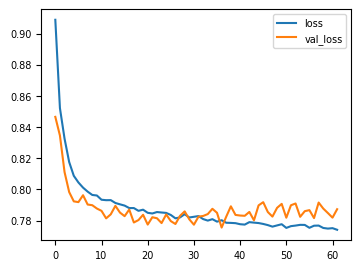

In [155]:
loss_df = pd.DataFrame(cred_score_model.history.history)
loss_df.plot(figsize=(4,3))

Not bad.

It's probably useful to save this neural network as it is reasonably deep and extensive and can take time to train

In [156]:
cred_score_model.save('cred_score_model.h5')

In [157]:
# from tensorflow.keras.models import load_model  # If using backed up model

In [158]:
# cred_score_model = load_model('cred_score_model.h5')  # Recalling backed up model

We shall now use our model to make predictions and evaluate its performance

In [159]:
predictions = cred_score_model.predict(X_test)
credit_score_predictions = np.round(predictions)
credit_score_predictions

938/938 [==============================] - 3s 2ms/step


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [160]:
from sklearn.metrics import classification_report

In [163]:
print(classification_report(y_test, credit_score_predictions, target_names=['Good','Poor','Standard']))

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00      5322
        Poor       0.70      0.61      0.65      8805
    Standard       0.63      0.81      0.71     15873

   micro avg       0.65      0.61      0.63     30000
   macro avg       0.44      0.47      0.45     30000
weighted avg       0.54      0.61      0.56     30000
 samples avg       0.61      0.61      0.61     30000



/home/cuprogrammerlplinux/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cuprogrammerlplinux/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model is fairly sensitive in predicting standard credit score customers, as expected (see comments just after cell 9), but less sensitive in predicting poor credit score customers although its precision for predicting poor credit score customers is better than its precision for standard credit score customers. By contrast, our model has zero sensitivity for predicting good credit score customers. There may be a variety of reasons for this: For instance, the model may require more data (recall that the countplot for good credit score customers was the lowest of the three). Another possible cause is that the model may require many more layers and neurons and/or a longer training time, but as we saw in cells 154 and 155, our validation data simply didn't support a training time of up to 70 cycles. Yet another factor is the poor correlation between the various features and the credit score (see cell 11) so it may not be surprising that the features were not as predictive as we would have liked. Let us see if our model predicted good for anyone

In [168]:
good_list = []
for i in credit_score_predictions:
    if i[0] == 1:
        good_list.append(i[0])
    else:
        pass

In [169]:
good_list

[]

So, despite the fact that the test sample offered 5322 loans to customers labelled with a good credit score, our model deemed that none of those customers were good credit score customers because (presumably) the values of their features were too similar to customers with standard and poor credit scores. In some ways, this makes sense, given what our countplots in cells 13 and 14 revealed. Another really important point to mention is that looking at the original data, it was not unusual for a customer to be labelled with a credit score of good for one loan and then standard for a different loan. This fluctuation between good and standard for the same customer would have been picked up by our model!

Perhaps, the result that we ended up with is not necessarily a bad reflection on our model. Lending is, by its very nature, a risky business, and lenders don't often get their money (or all their money) back. Even customers with seemingly high incomes and excellent credit histories can unexpectedly fall on hard times and suddenly, s/he is no longer able to keep up with loan repayments. So, if our model is less 'enthusiastic' about a prospective customer than his/her numbers appear to suggest, perhaps, that is a good thing:)